<a href="https://colab.research.google.com/github/aanastasish/TEST/blob/master/SWOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Информация об исполнителе

In [125]:
print('Выполнила Шамрикова Анастасия Александровна')
print('Группа 20 БИ-2')
print('Временная зона GMT +3')
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Выполнила Шамрикова Анастасия Александровна
Группа 20 БИ-2
Временная зона GMT +3
Mon Mar 15 21:53:40 MSK 2021


Связь с Google Drive

In [126]:
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/SWOT-analysis'))
%ll -lF /content/drive/MyDrive/SWOT-analysis
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())
table = gs.open_by_key('1W1sd23WrgBg_qcET1-buzb3b3a_JZpBDguQ43tDQsMw')
print(table.worksheets())

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'drive', 'adc.json', 'sample_data']
['MyDrive', '.file-revisions-by-id', '.shortcut-targets-by-id', '.Trash']
['Prices.gsheet', 'SWOT.gsheet', 'SWOT.ipynb', '.ipynb_checkpoints', 'swot_dictionary11.json']
total 60
-rw------- 1 root   151 Mar  2 23:33 Prices.gsheet
-rw------- 1 root    81 Mar 15 21:53 swot_dictionary11.json
-rw------- 1 root   151 Mar 15 21:52 SWOT.gsheet
-rw------- 1 root 59523 Mar 15 21:50 SWOT.ipynb
[<Worksheet 'SWOT' id:1291277922>, <Worksheet 'Strengths' id:2132343520>, <Worksheet 'Weaknesses' id:691495457>, <Worksheet 'Opportunities' id:1839731318>, <Worksheet 'Threats' id:65940110>]


Отдельные элементы SWOT-анализа

Strengths
1 ['Персональный подход к клиенту', 'Создание индивидуального товара для клиента (по его меркам, выбранному фасону и материалу)', '9', '1', '9']
2 ['Высокое качество изделий', 'Ручная работа и качественные материалы', '10', '0.95', '9.5']
3 ['Оправданная цена', 'Соотношение цены и качества', '10', '0.9', '9']
4 ['Большой ассортимент', 'Выбор материалов и фасонов на любой вкус', '8', '1', '8']
5 ['Дизайн ', 'Соответствие модным тенденциям', '8', '0.8', '6.4']
Values:  [[9.0], [9.5], [9.0], [8.0], [6.4]]
Result:  41.9


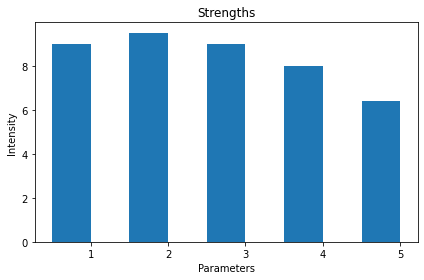

1  -  Персональный подход к клиенту
2  -  Высокое качество изделий
3  -  Оправданная цена
4  -  Большой ассортимент
5  -  Дизайн 


In [127]:
# Считываем данные таблицы и достраиваем ее
print('Strengths')
worksheet = table.worksheet("Strengths")
rows = worksheet.get_all_values()
strength = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 6):
    print(i, row)
    strength.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2]) * float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2]) * float(row[3]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('E2:E100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Strengths')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1

Weaknesses
1 ['Ограничения по количеству производимого товара', 'Расширение производства и наем новых работников с увеличением количества заказов', '6', '0.7', '4.2']
2 ['Долгое время на привлечение клиентов в начале', 'Закупка рекламы;  введение системы лояльности для постоянных клиентов (скидки и подарки)', '6', '0.6', '3.6']
3 ['Относительно долгий период до начала окупаемости бизнеса', 'Возможность дополнительного заработка в виде пошива изделий для оптовой продажи физическим магазинам', '8', '0.7', '5.6']
4 ['Наличие только интернет-магазина ', 'Открытие физического магазина-ателье (где можно вживую подобрать фасон, материал, снять мерки и тд)', '3', '0.1', '0.3']
Values:  [[4.199999999999999], [3.5999999999999996], [5.6], [0.30000000000000004]]
Result:  13.7


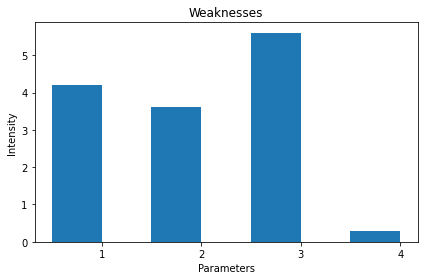

1  -  Ограничения по количеству производимого товара
2  -  Долгое время на привлечение клиентов в начале
3  -  Относительно долгий период до начала окупаемости бизнеса
4  -  Наличие только интернет-магазина 


In [128]:
# Считываем данные таблицы и достраиваем ее
print('Weaknesses')
worksheet = table.worksheet("Weaknesses")
rows = worksheet.get_all_values()
weaknesses = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 5):
    print(i, row)
    weaknesses.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2]) * float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2]) * float(row[3]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('E2:E100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Weaknesses')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1


Opportunities
1 ['Растущее недовольство товаром в сетевых магазинах (из-за несоответствия цены и качества)', 'Предложение товара с оправданной ценой и хорошим качеством', '8', '0.8', '6.4']
2 ['Модные тенденции, превозносящие ручную работу, качественный материал и удобство в носке', 'Следование тенденциям и поддержка идей этичной моды (что помогает заручиться поддержкой и лояльностью клиентов)', '6', '0.7', '4.2']
3 ['Оптовые заказы от физических магазинов', 'Возможность пошива по стандартным лекалам для оптовой продажи в другие магазины (увеличение прибыли)', '5', '0.15', '0.75']
4 ['Большой выбор необходимых для запуска бизнеса средств', 'Закупки материалов и др. по адекватным ценам; возможность выбора; разнообразие, которое будет привлекать клиентов', '8', '0.8', '6.4']
Values:  [[6.4], [4.199999999999999], [0.75], [6.4]]
Result:  17.75


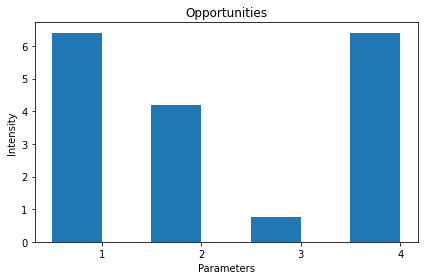

1  -  Растущее недовольство товаром в сетевых магазинах (из-за несоответствия цены и качества)
2  -  Модные тенденции, превозносящие ручную работу, качественный материал и удобство в носке
3  -  Оптовые заказы от физических магазинов
4  -  Большой выбор необходимых для запуска бизнеса средств


In [129]:
# Считываем данные таблицы и достраиваем ее
print('Opportunities')
worksheet = table.worksheet("Opportunities")
rows = worksheet.get_all_values()
opportunities = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 5):
    print(i, row)
    opportunities.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2]) * float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2]) * float(row[3]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('E2:E100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Opportunities')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1

Threats
1 ['Большая конкуренция на рынке', 'Приобретение лояльной аудитории; расширение ассортимента товаров (например, купальники и домашняя одежда)', '8', '0.85', '6.8']
2 ['Недостаток кадров, специализирующихся на данной области', 'Обучение "под себя" потенциальных работников; предложение зарплаты выше, чем у конкурентов', '5', '0.5', '2.5']
3 ['Повышение цен на материалы и фурнитуру', 'Закупка бОльшими партиями; поиск постоянного продавца (со скидками для постоянных покупателей)', '5', '0.6', '3']
4 ['Снижение платежеспособности клиентов', 'Введение системы скидок для постоянных клиентов', '9', '0.7', '6.3']
5 ['Проблемы с сайтом', 'Добавить клиенту возможность связаться другим способом (через соц.сети, телефон); открытие физического магазина', '3', '0.05', '0.15']
Values:  [[6.8], [2.5], [3.0], [6.3], [0.15000000000000002]]
Result:  18.75


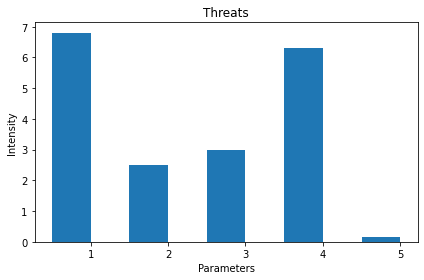

1  -  Большая конкуренция на рынке
2  -  Недостаток кадров, специализирующихся на данной области
3  -  Повышение цен на материалы и фурнитуру
4  -  Снижение платежеспособности клиентов
5  -  Проблемы с сайтом


In [130]:
# Считываем данные таблицы и достраиваем ее
print('Threats')
worksheet = table.worksheet("Threats")
rows = worksheet.get_all_values()
threats = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 6):
    print(i, row)
    threats.append(row[0])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2]) * float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2]) * float(row[3]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('E2:E100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Threats')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1

Итоговая таблица

SWOT
[1, 2, 3, 4, 5] ['Strengths', 'Weaknesses', 'Opportunities', 'Threats', 'Result'] [41.9, -13.7, 17.75, -18.75, 27.200000000000003]


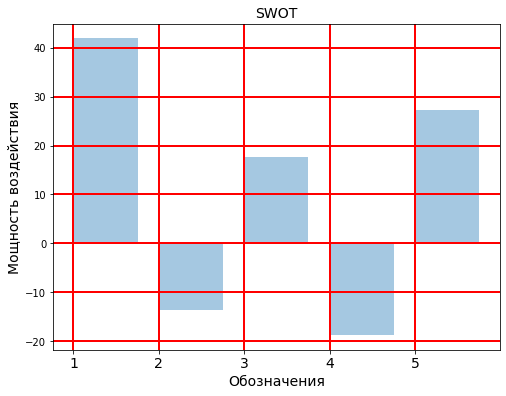

1  -  Strengths ; 
2  -  Weaknesses ; 
3  -  Opportunities ; 
4  -  Threats ; 
5  -  Result ; 


In [131]:
print('SWOT')
import os
import json

def matplot(element):
  import matplotlib.pyplot as plt
  x = list()
  x_float = list()
  title = list()
  y_float = list()

  worksheet = table.worksheet('Strengths')
  stren =  worksheet.acell('E8').value
  worksheet = table.worksheet('Weaknesses')
  weak =  worksheet.acell('E8').value
  worksheet = table.worksheet('Opportunities')
  op =  worksheet.acell('E8').value
  worksheet = table.worksheet('Threats')
  thr =  worksheet.acell('E8').value
  
  worksheet = table.worksheet('SWOT')
  worksheet.update('B2', stren)
  stren = worksheet.acell('B2').value
  worksheet.update('B3', weak)
  weak = worksheet.acell('B3').value
  worksheet.update('B4', op)
  op = worksheet.acell('B4').value
  worksheet.update('B5', thr)
  thr = worksheet.acell('B5').value

  read_file = open('/content/drive/MyDrive/SWOT-analysis/swot_dictionary11.json', 'r+')
  read_file.write('{Strengths: ')
  read_file.write(stren)
  read_file.write(', Weaknesses: ')
  read_file.write(weak)
  read_file.write(', Opportunities: ')
  read_file.write(op)
  read_file.write(', Threats: ')
  read_file.write(thr)
  read_file.write('}')
  
  result = 0
  i = 0
  for line in read_file.readlines():
    i += 1
    data = json.loads(line)
    title = ["Strengths", "Weaknesses", "Opportunities", "Threats", "Result"]
    x = title
    x_float = [1, 2, 3, 4, 5]
    result = float(data['Strengths']) - 1*float(data['Weaknesses']) + float(data['Opportunities']) - 1*float(data['Threats'])
    y = [float(data['Strengths']), float(data['Weaknesses']), float(data['Opportunities']), float(data['Threats'])]
    y_float = [float(data['Strengths']), -1*float(data['Weaknesses']), float(data['Opportunities']), -1*float(data['Threats']),  result]
  print(x_float,title,y_float)

  worksheet = table.worksheet('SWOT')
  worksheet.update('B6', result)
  read_file.close()
  x_pos = list()
  for i in range (x_float.__len__()):
    x_pos.append(i)
  fig=plt.figure(figsize=(8,6), dpi=72)
  plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
  plt.xticks(x_pos,  x_float, fontsize=14)
  plt.xlabel('Обозначения', fontsize=14)
  plt.ylabel('Мощность воздействия', fontsize=14)
  plt.title('SWOT', fontsize=14)
  plt.grid(True, color='r', linestyle='-', linewidth=2)
  plt.show()

  for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1

if __name__ == "__main__":
    element = 'swot_dictionary'
    matplot(element)